## overview of how to build a System Dynamics model using the BPTK-Py framework

In [2]:
pip install BPTK_Py

Note: you may need to restart the kernel to use updated packages.


In [3]:
# BPTK_Py is a simple python library for system dynamics
from BPTK_Py import Model 
from BPTK_Py import sd_functions as sd

In [4]:
# create a model using the Model class. 
# model will contain all our model elements such as stocks, flows, converters and constants.
model = Model(starttime=0,stoptime=120,dt=1,name='SimpleProjectManagament')

In [5]:
# Creating model elements
openTasks = model.stock("openTasks")

In [6]:
# Let us define the other model elements and variables 
closedTasks = model.stock("closedTasks") 
staff = model.stock("staff") 
completionRate = model.flow("completionRate") 
currentTime = model.converter("currentTime") 
remainingTime = model.converter("remainingTime") 
schedulePressure = model.converter("schedulePressure") 
productivity = model.converter("productivity") 
deadline = model.constant("deadline") 
effortPerTask = model.constant("effortPerTask") 
initialStaff = model.constant("initialStaff") 
initialOpenTasks = model.constant("initialOpenTasks")

In [10]:
#  let us initialize our stocks – to do this, we just need to set the initial_value property of the stocks. 
closedTasks.initial_value = 0.0
staff.initial_value = initialStaff 
openTasks.initial_value = initialOpenTasks

In [13]:
deadline.equation = 100.0
effortPerTask.equation = 1.0
initialStaff.equation = 1.0
initialOpenTasks.equation = 100.0

In [14]:
# The currentTime variable tracks the simulation time, which is captured by the time function in the SD function library.
currentTime.equation=sd.time()

In [15]:
# The remainingTime equals the difference between the deadline and the currentTime:
remainingTime.equation = deadline - currentTime

In [17]:
# the openTasks only have an outflow (defined by the completionRate) 
# and the closedTasks only have an inflow (also defined by the completionRate)
openTasks.equation = -completionRate 
closedTasks.equation = completionRate

In [18]:
# We use the min and max functions from the SD function library to ensure that no division by zero occurs 
# and that the schedule pressure is capped at 2.5:
schedulePressure.equation = sd.min( (openTasks*effortPerTask)/ (staff*sd.max(remainingTime,1)), 2.5 )

In [21]:
# We define the productivity in our model using a non-linear relationship 
# (depending on the schedule pressure). We capture this relationship in a lookup table 
# that we store in the points property of the model (using a Python list):
model.points["productivity"] = [ [0,0.4], [0.25,0.444], [0.5,0.506], [0.75,0.594], [1,1], [1.25,1.119], [1.5,1.1625], [1.75,1.2125], [2,1.2375], [2.25,1.245], [2.5,1.25] ]

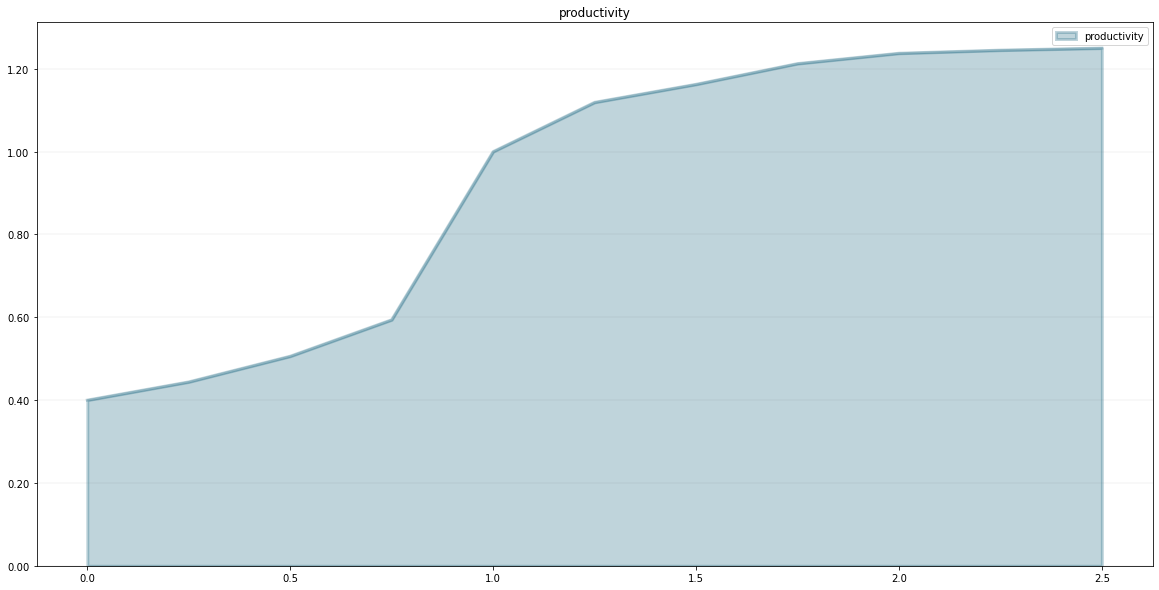

In [22]:
# plot the lookup table to see whether it has the right shape:
model.plot_lookup("productivity")